# PART5 相関関係を調べてみよう

## おまじない

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

## データの読み込み
- train.csvを読み込みましょう
- 読み込んだものは変数trainに代入しましょう

In [2]:
train = pd.read_csv("bento/train.csv")

## trainの先頭行を確認してみましょう

In [3]:
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


## trainのyとtemperatureの相関関係を調べてみましょう
- 相関関係とは、Aという事象とBという事象の間、双方向の動きに関係があることを言います
- 例えば、気温が上がると弁当の売り上げ数もあがる関係があった場合、正の相関があると言ったりします
- 逆に、気温が上がると弁当の売り上げが下がる関係があった場合、負の相関があると言います
- なお、相関関係と因果関係は異なる為、注意が必要です
- この関係の度合は相関係数と呼ばれる数値で表されます
- 具体的にはcorr関数を使います

In [4]:
train[["y", "temperature"]].corr()

,y,temperature
y,1.000000,-0.655332
temperature,-0.655332,1.000000


## 今度はyとkcalの相関関係を調べてみましょう
- 本来、欠損値があると相関係数は測定できませんが、プログラムでは自動的に欠損値の行は削除されて計算されます

In [5]:
train[["y", "kcal"]].corr()

,y,kcal
y,1.000000,0.147269
kcal,0.147269,1.000000


## yとtemperatureとの散布図を描いてみましょう
- 相関係数は散布図を描いてみるとわかりやすいと思います
- 散布図はplot.scatter関数を使います
- オプションとして、x="temperature", y="y", figsize=(5,5)と書きます

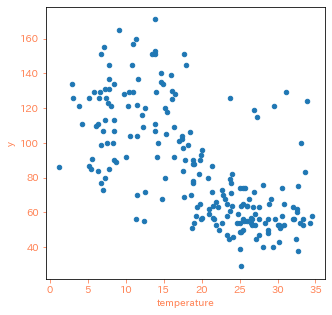

In [6]:
train.plot.scatter(x="temperature", y="y", figsize=(5, 5))

## yとkcalとの散布図も描いてみましょう

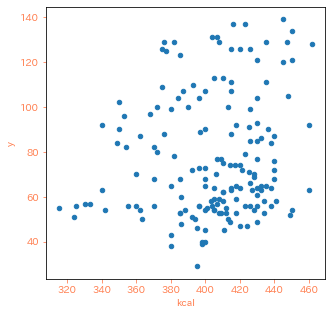

In [7]:
train.plot.scatter(x="kcal", y="y", figsize=(5, 5))